In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.metrics import accuracy_score, f1_score
from lightgbm import LGBMClassifier
import xgboost as xgb

In [28]:
df = pd.read_csv('prepro_data/최종+재무제표.csv', index_col=0)

In [29]:
y = df.updown[5:]
x = df.loc[:, [ 'tesla', 'tesla_거래량', 'oli_price', 'EVE거래량', 'alu_change']][:-5]
#x_de = df.drop(['updown', 'date'], axis=1)[:-1]
#x = x_de.loc[:, []]

In [30]:
x_train = x[:1444]
x_test = x[1444:]
y_train = y[:1444]
y_test = y[1444:]

In [31]:
lgbm = LGBMClassifier()
xgbs = xgb.XGBClassifier()

models = [lgbm, xgbs]

for model in models:
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(model.__class__.__name__)
    print('accuracy_score :', accuracy_score(y_test, preds))
    print('f1_score :', f1_score(y_test, preds))
    #print('classification_report :', classification_report(y_test, preds))


LGBMClassifier
accuracy_score : 0.6201117318435754
f1_score : 0.5952380952380953
[19:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5754189944134078
f1_score : 0.5824175824175825


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [21]:
# confusion_matrix 시각화

In [22]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

In [24]:
cm = confusion_matrix(y_test, preds)
cm

array([[100,  66],
       [ 86, 106]], dtype=int64)

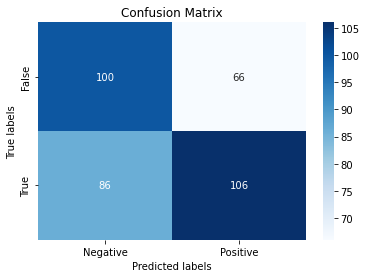

In [25]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['False', 'True']);